In [2]:
# This is library for assist the process in preprocess, building a method and visualization
import pandas as pd 
import numpy as np 
import math

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
# This function is for preprocessing data from raw to new dataframe that ready to analyze further.
def preprocess(df):
    df = df.select_dtypes(include=['float64'])
    df = df.dropna()
    df.corr(method ='pearson')
    correlation_feature = correlations(df,0.80)
    scaler = StandardScaler()
    df = scaler.fit_transform(df)
    return df

# This function is to collect the columns that has the percantage above 79 of corralation and drop the the others attributes
# that only get the percentage above 80%

def correlations(df,threshold):
    col_correlation = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>=threshold: 
                colname = corr_matrix.columns[i]
                col_correlation.add(colname)
        if corr_matrix.columns[i] not in col_correlation:
            df.__delitem__(corr_matrix.columns[i])
    return col_correlation

# This function is to calculate the distance of samples and centrois.
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# This function is measure the quality of cluster by calculate the sum square error
def _sse(df,clusters,centroids):
    _total = 0
    for center, idx_samples in zip(centroids, clusters):
        _sum = 0
        for idx, samples in enumerate(idx_samples):
            _sum += np.sum((df[samples]-center)**2)
        _total += _sum
    return _total

# This function is for gathering the samples that close to the centroids in order to create the clustes
def create_clusters(df,k,centroids):
    clusters = [[] for _ in range(k)]
    for idx, row in enumerate(df):
        distances = [euclidean_distance(row, dot) for dot in centroids]
        closest_index = np.argmin(distances)
        clusters[closest_index].append(idx)
    return clusters

#This function is uodating the centroid by using the mean value of clusters.
def update_centroids(df,k,clusters):
    centroids = np.zeros((k,df.shape[1]))
    for cluster_idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(df[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids

# This function is to check the consistent of the centroids by using euclidean distance.
#if the distance between old_centroids and new centroids is equal to zero, then the final centroid is permanent.
def is_consistent(k,previous_centroid,centroids):
    distances = [euclidean_distance(previous_centroid[i], centroids[i]) for i in range(k)]
    return sum(distances) == 0

# This function is to plot the final clusters that have already evaluate in elbow method  
def plot(df,clusters,centroids):
    final_cluster = np.empty(len(df))
    for idx_cluster, cluster in enumerate(clusters):
        for idx_sample in cluster:
            final_cluster[idx_sample] = idx_cluster
    plt.scatter(df[:,0],df[:,1],c=final_cluster,cmap='brg')
    plt.scatter(centroids[:,0],centroids[:,1], marker="x", color='black',linewidth=2)
    print("The center of the clusters are: ",centroids)

KeyboardInterrupt: 

In [11]:
# This function is to call all of the procedures and function to build a model and evaluation.
# This function will return plot clusters when the cluster is finishing the evaluatation else 
# return the process of evalution (SSE function)
def clustering(df,k,plot_clusters):
    random_centroid_idx = np.random.choice(len(df),k,replace=False)
    centroids = [df[idx] for idx in random_centroid_idx]

    for _ in range(100):

        clusters = create_clusters(df,k,centroids)
          
        previous_centroids = centroids
        centroids = update_centroids(df,k,clusters)
        
        if is_consistent(k,previous_centroids, centroids):
            break
    if plot_clusters:
        return plot(df,clusters,centroids)
    else:
        return _sse(df,clusters,centroids)


In [12]:
# This function is to plot the evaluation of clustering and modeling
# PCA function is to reduce the dimention of dataset to 2-D.
def main():
    dataset = pd.read_csv("salju_train.csv")
    df = preprocess(dataset)
    y = []
    plot_parts = False
    for k in range(2,11):
        y_idx = clustering(df,k,plot_parts)
        y.append(y_idx)

    x = [2,3,4,5,6,7,8,9,10]

    plt.figure(figsize=(16,8))
    plt.plot(x, y, 'o-')
    plt.xlabel('k')
    plt.ylabel('Sum Square Error')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

    get_k = np.argmax([math.acos(y[idx+1]/y[idx])*(180/(22/7)) for idx in range(len(y)-1)])
    k = get_k + 3
    print("The optimal k of Elbow Method is: ",k)

    pca = PCA(n_components=2)
    df = pca.fit_transform(df)
    plot_parts = True
    plot_cluster = clustering(df,k,plot_parts)
 

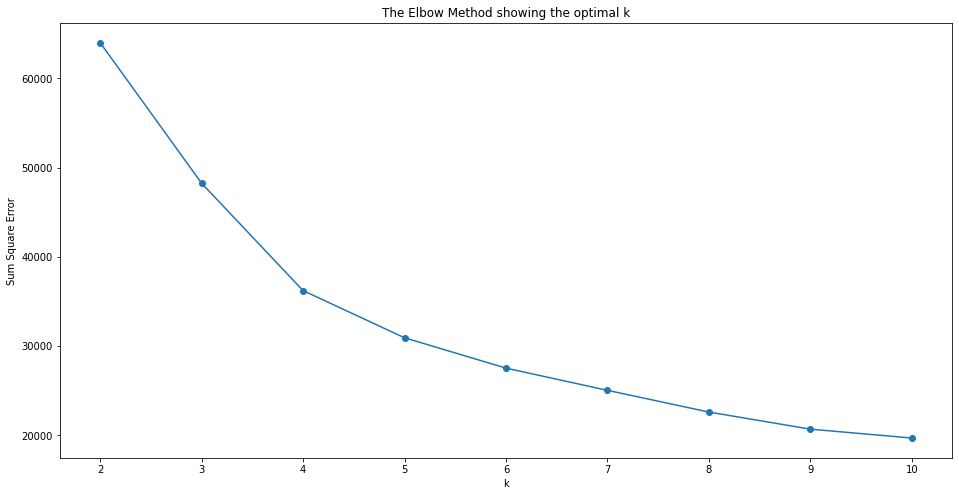

The optimal k of Elbow Method is:  4
The center of the clusters are:  [[ 1.93368049 -0.07249301]
 [ 0.15045988 -0.29822793]
 [-1.74468464 -0.32575525]
 [-0.58104776  1.32998005]]


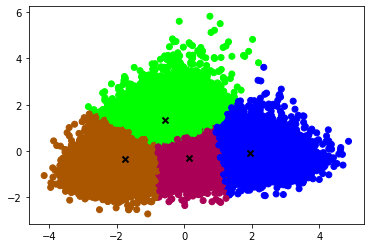

In [13]:
main()